In [78]:
import pandas as pd 
df = pd.read_excel("voterscounties-2.xlsx")
df.columns = ["county_code","county_name","voters","polling_stations"]
df.head()

,county_code,county_name,voters,polling_stations
0,COUNTY_CODE,COUNTY_NAME,VOTERS,NO. OF POLLING STATIONS
1,001,MOMBASA,580223,934
2,002,KWALE,281041,612
3,003,KILIFI,508068,988
4,004,TANA RIVER,118327,307


In [79]:
#covert voters into numeric
df["voters"]=pd.to_numeric(df["voters"],errors = "coerce")
df = df.dropna(subset=["voters"])

In [80]:

# Get the top 5 counties by voters
top_5 = df.sort_values(by="voters", ascending=False).head(6)


# Ensure county_name is of string type and not containing NaNs
top_5["county_name"] = top_5["county_name"].astype(str)
top_5 = top_5.dropna(subset=["county_name", "voters"])
top_5 = top_5[~top_5['county_name'].isin(['nan', 'Grand Total'])]


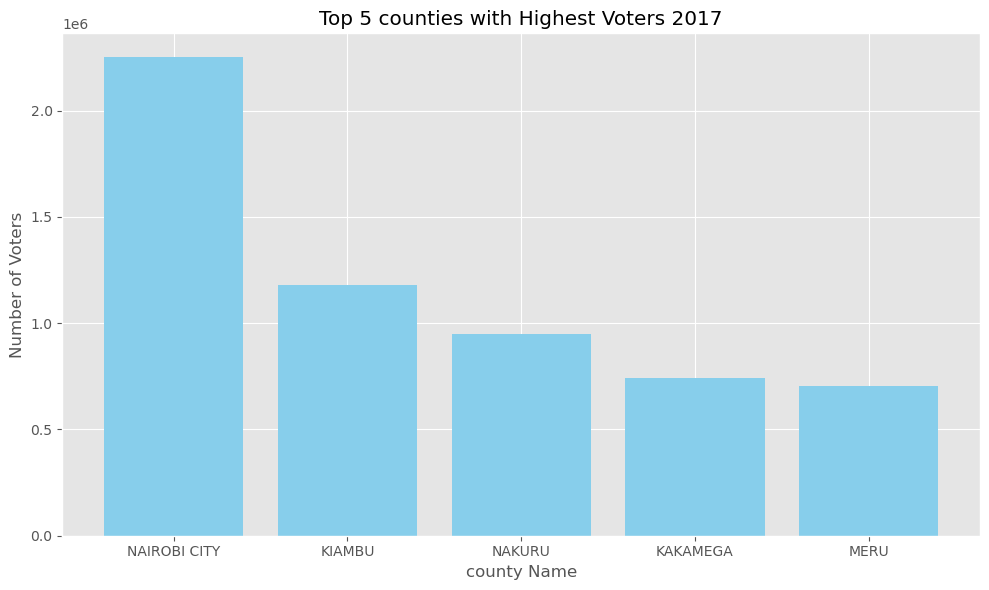

In [81]:
#ploting 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
plt.figure(figsize=(10,6))
plt.bar(top_5["county_name"], top_5["voters"],color = "skyblue")
plt.title("Top 5 counties with Highest Voters 2017")
plt.xlabel("county Name")
plt.ylabel("Number of Voters")
plt.tight_layout()
plt.show()

In [82]:
lowest_5 = df.sort_values(by = "voters", ascending = True).head(5)
lowest_5["county_name"]=lowest_5["county_name"].astype(str)
lowest_5 =lowest_5.dropna(subset = "county_name")

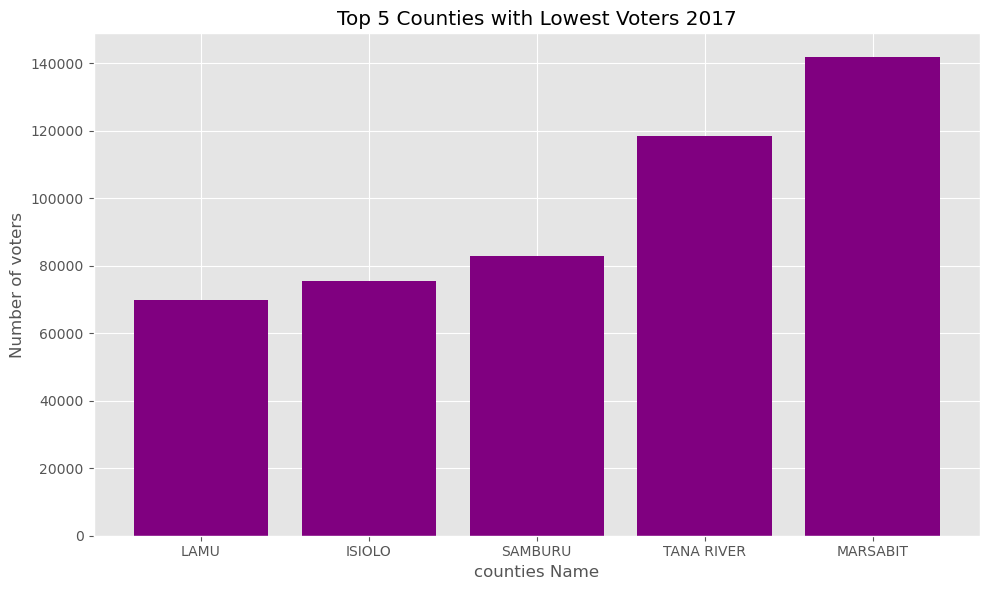

In [83]:
plt.figure(figsize= (10,6))
plt.bar(lowest_5["county_name"],lowest_5["voters"], color = "purple")
plt.title("Top 5 Counties with Lowest Voters 2017")
plt.xlabel("counties Name")
plt.ylabel("Number of voters")
plt.tight_layout()
plt.show()

In [84]:
#converting the polling_stations to Numeric
df["polling_stations"] = pd.to_numeric(df["polling_stations"],errors = "coerce")
#get counties with highest polling stations
top_polling = df.sort_values(by="polling_stations",ascending=False).head(5)


In [85]:
# Remove rows where 'county_name' is "nan" or NaN (if any) from the original df
df = df[df['county_name'] != 'nan']
df = df.dropna(subset=['county_name'])

# Extract the top 4 and bottom 4 counties based on polling stations
top_4 = df.sort_values(by="polling_stations", ascending=False).head(4)
bottom_4 = df.sort_values(by="polling_stations", ascending=True).head(4)

# Combine the two dataframes
combined = pd.concat([top_4, bottom_4])

# Double-check and filter out 'nan' or NaN values again after combining
combined = combined[combined['county_name'] != 'nan']
combined = combined.dropna(subset=['county_name'])

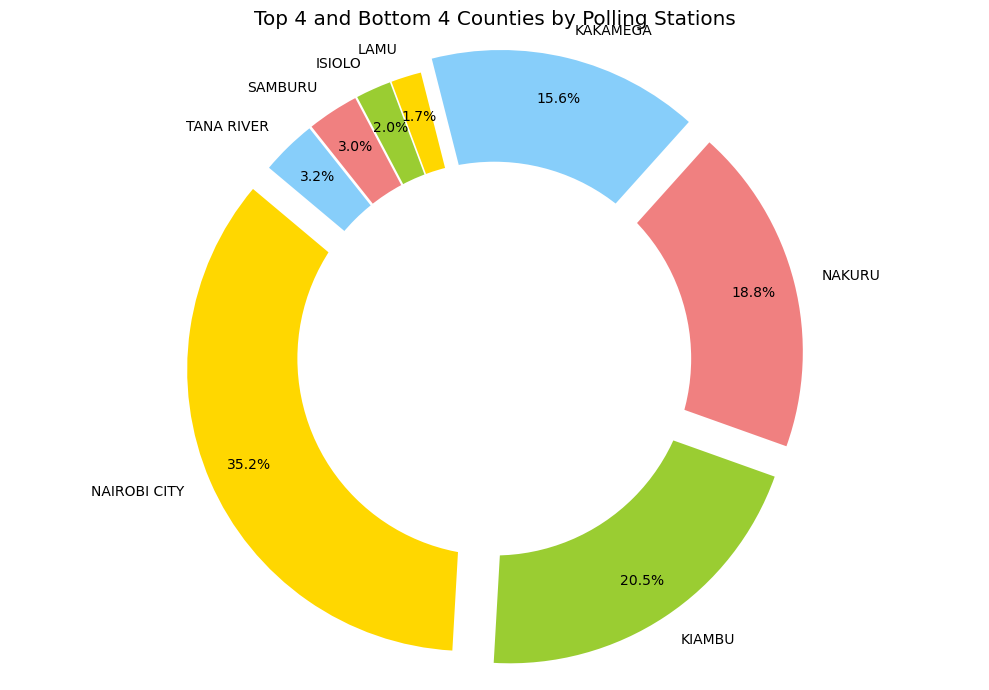

In [65]:
# Values for the donut chart
labels = combined["county_name"].tolist()
sizes = combined["polling_stations"].tolist()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue'] * 2  # Repeated for 8 counties
explode = (0.1, 0.1, 0.1, 0.1, 0.05, 0.05, 0.05, 0.05)  # Separate the slices a bit

# Plotting
plt.figure(figsize=(10,7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', 
        startangle=140, pctdistance=0.85, explode=explode)

# Draw a circle at the center of pie to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Top 4 and Bottom 4 Counties by Polling Stations")
plt.tight_layout()
plt.show()


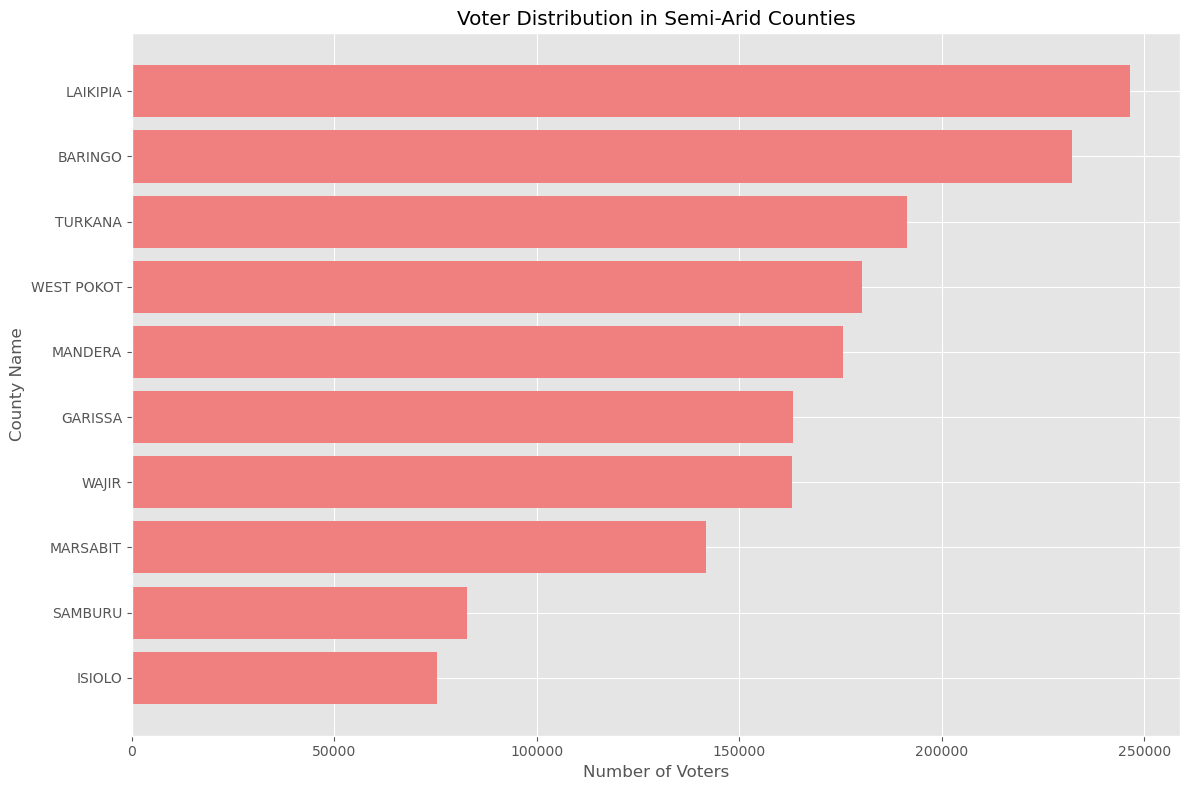

In [86]:
# List of semi-arid counties
semi_arid_counties = ['GARISSA','WAJIR','MANDERA','MARSABIT','ISIOLO','BARINGO','SAMBURU','TURKANA','WEST POKOT','LAIKIPIA']

# Filter the dataframe to include only the specified counties
semi_arid_df = df[df['county_name'].isin(semi_arid_counties)]
# Sort the dataframe by the 'voters' column
semi_arid_df = semi_arid_df.sort_values(by='voters', ascending=True)

# Plotting a horizontal bar chart
plt.figure(figsize=(12,8))
plt.barh(semi_arid_df['county_name'], semi_arid_df['voters'], color='lightcoral')
plt.xlabel('Number of Voters')
plt.ylabel('County Name')
plt.title('Voter Distribution in Semi-Arid Counties')
plt.tight_layout()
plt.show()


In [74]:
print(df['county_name'].unique())


['MOMBASA' 'KWALE' 'KILIFI' 'TANA RIVER' 'LAMU' 'TAITA TAVETA' 'GARISSA'
 'WAJIR' 'MANDERA' 'MARSABIT' 'ISIOLO' 'MERU' 'THARAKA - NITHI' 'EMBU'
 'KITUI' 'MACHAKOS' 'MAKUENI' 'NYANDARUA' 'NYERI' 'KIRINYAGA' "MURANG'A"
 'KIAMBU' 'TURKANA' 'WEST POKOT' 'SAMBURU' 'TRANS NZOIA' 'UASIN GISHU'
 'ELGEYO/MARAKWET' 'NANDI' 'BARINGO' 'LAIKIPIA' 'NAKURU' 'NAROK' 'KAJIADO'
 'KERICHO' 'BOMET' 'KAKAMEGA' 'VIHIGA' 'BUNGOMA' 'BUSIA' 'SIAYA' 'KISUMU'
 'HOMA BAY' 'MIGORI' 'KISII' 'NYAMIRA' 'NAIROBI CITY']


In [88]:

# Define the list with the correct name
coastal_counties = ['MOMBASA', 'KWALE','KILIFI', 'TANA RIVER', 'LAMU', 'TAITA TAVETA']

# Filter the DataFrame
coastal_counties_df = df[df['county_name'].isin(coastal_counties)]


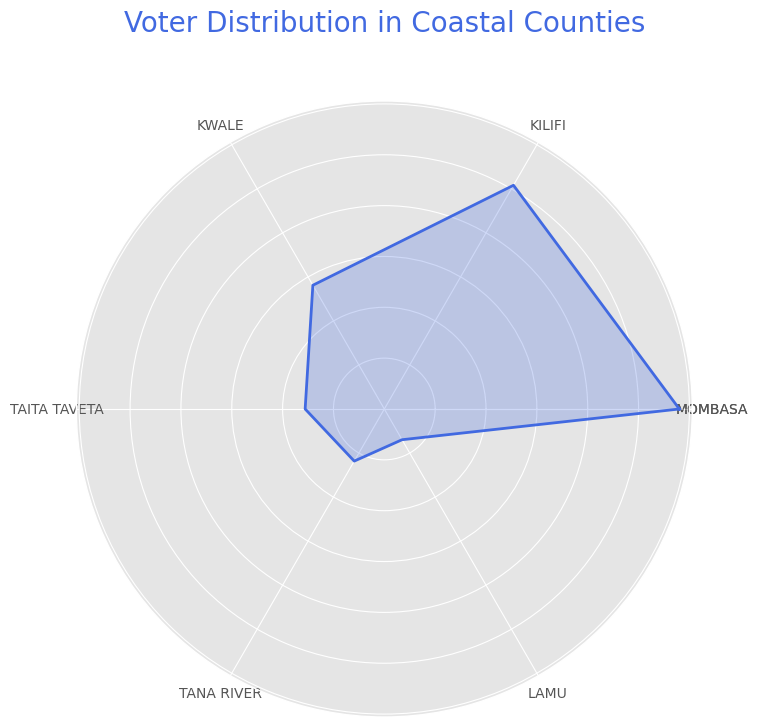

In [92]:
import numpy as np
# Sort the dataframe for better visualization
coastal_counties_df = coastal_counties_df.sort_values(by='voters', ascending=False)

# Prepare data for radar/spider plot
labels = coastal_counties_df['county_name'].tolist()
values = coastal_counties_df['voters'].tolist()

# Number of variables (counties)
num_vars = len(labels)

# Compute angle for each county
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Radar plot should be a closed circle, so append the start value to the end
values += values[:1]
angles += angles[:1]
labels += labels[:1]

# Plotting
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='royalblue', alpha=0.25)
ax.plot(angles, values, color='royalblue', linewidth=2)
ax.set_yticklabels([])
ax.set_xticks(angles)
ax.set_xticklabels(labels)

# Title
plt.title('Voter Distribution in Coastal Counties', size=20, color='royalblue', y=1.1)

plt.show()


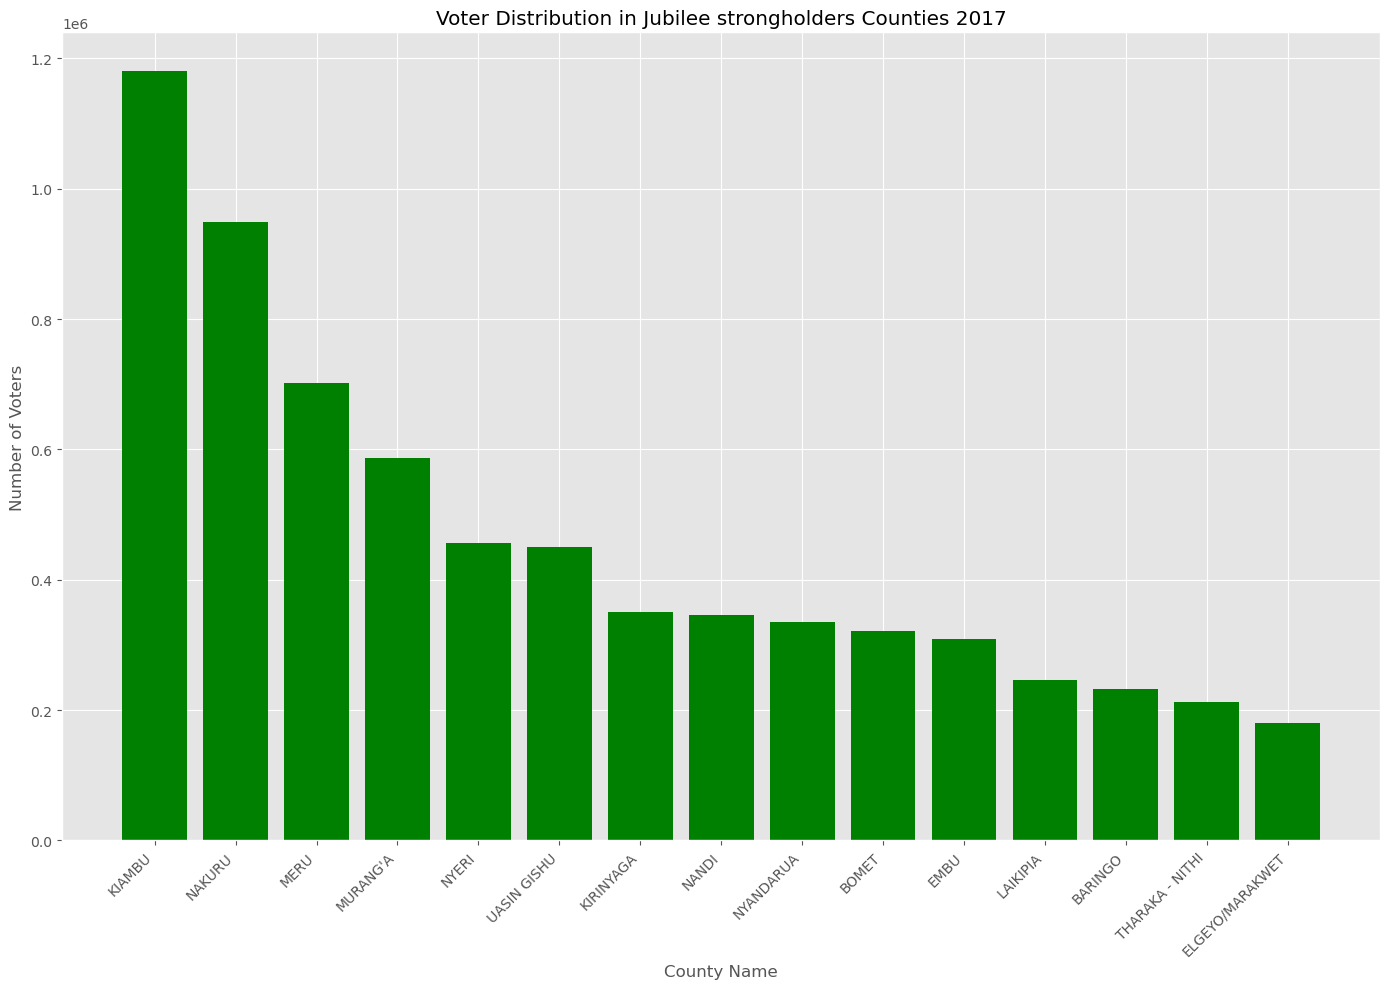

In [104]:
# List of counties
selected_counties = [
    "BOMET", "NANDI", "UASIN GISHU", "ELGEYO/MARAKWET", "NYANDARUA",
    "NYERI", "KIRINYAGA", "MURANG'A", "KIAMBU", "BARINGO",
    "LAIKIPIA", "NAKURU", "MERU", "THARAKA - NITHI", "EMBU"
]

# Filter the original DataFrame df to get only the selected counties
selected_counties_df = df[df['county_name'].isin(selected_counties)]


# Sort the dataframe for a better visualization
selected_counties_df = selected_counties_df.sort_values(by='voters', ascending=False)


# Plotting
plt.figure(figsize=(14, 10))
plt.bar(selected_counties_df['county_name'], selected_counties_df['voters'], color='green')
plt.ylabel('Number of Voters')
plt.xlabel('County Name')
plt.title('Voter Distribution in Jubilee strongholders Counties 2017')
plt.xticks(rotation=45, ha="right")  # Rotate county names for better readability
plt.tight_layout()
plt.show()


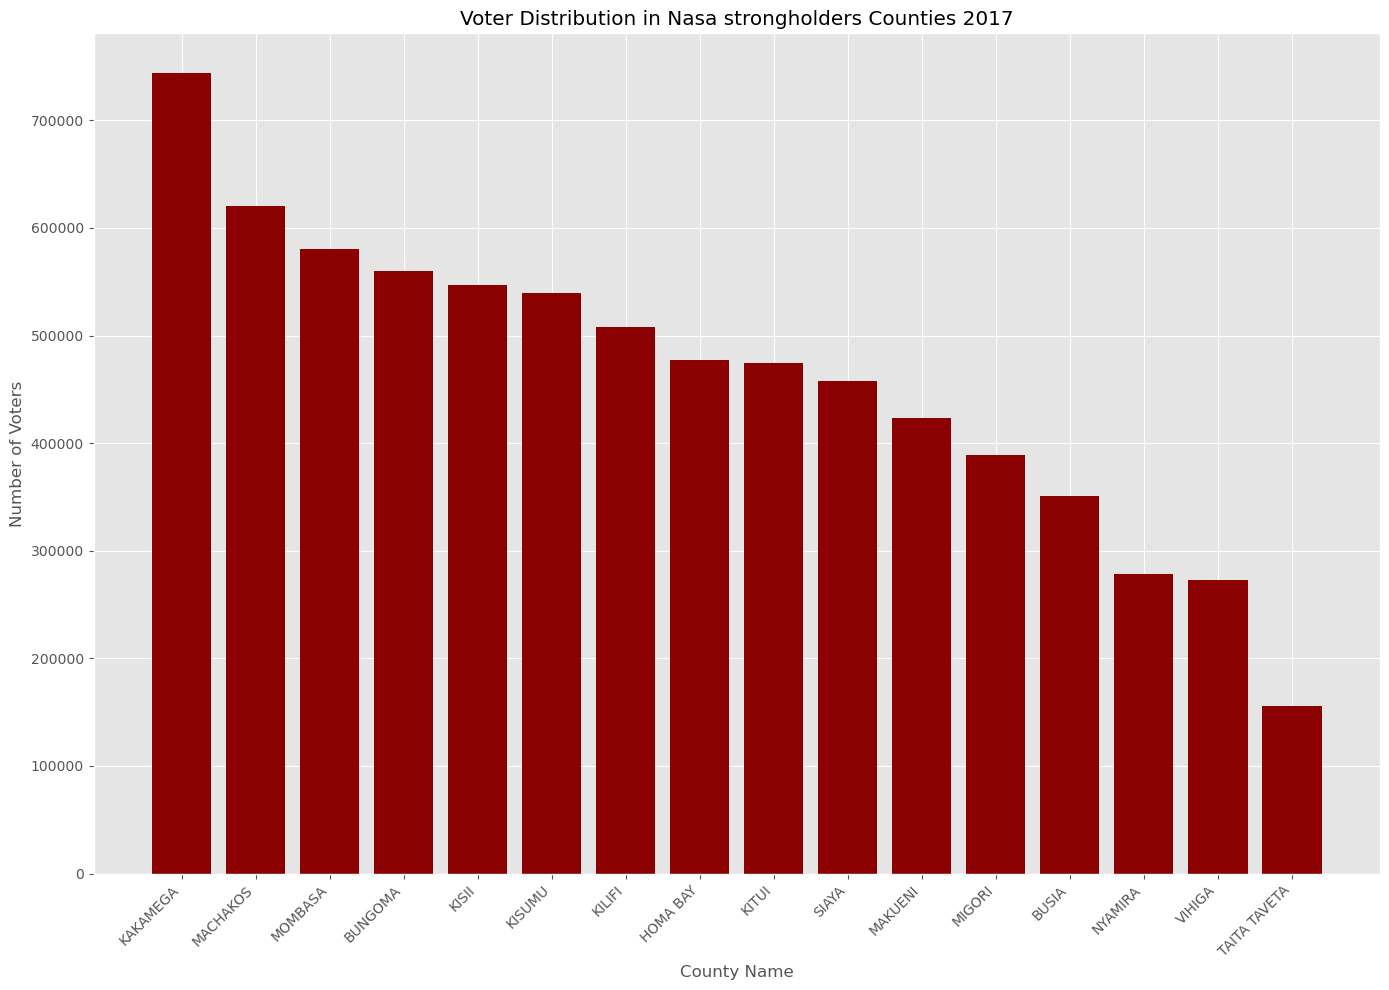

In [105]:
# New list of counties
selected_counties = [
    "HOMA BAY", "MIGORI", "KISII", "NYAMIRA", "KAKAMEGA", "VIHIGA", "BUNGOMA",
    "BUSIA", "SIAYA", "KISUMU", "KITUI", "MACHAKOS", "MAKUENI", "MOMBASA",
    "KILIFI", "TAITA TAVETA"
]

# Filter the original DataFrame df to get only the selected counties
selected_counties_df = df[df['county_name'].isin(selected_counties)]

# Sort the dataframe for a better visualization
selected_counties_df = selected_counties_df.sort_values(by='voters', ascending=False)

# Plotting
plt.figure(figsize=(14, 10))
plt.bar(selected_counties_df['county_name'], selected_counties_df['voters'], color='darkred')
plt.ylabel('Number of Voters')
plt.xlabel('County Name')
plt.title('Voter Distribution in Nasa strongholders Counties 2017')
plt.xticks(rotation=45, ha="right")  # Rotate county names for better readability
plt.tight_layout()
plt.show()
